<a href="https://colab.research.google.com/github/BeeBooBap/project-work-new-dataset/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# finding encoding

import chardet    
rawdata = open("supreme-court-decisions-dataset.csv", 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1252


In [3]:
# Import pandas package
import pandas as pd

# define number of columns
n = 53

# making data frame
df = pd.read_csv("supreme-court-decisions-dataset.csv", usecols=range(n), encoding=charenc)
	
# calling head() method and storing in new variable
data_top = df.head()
	
# display
data_top

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,10/23/1946,198.0,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. § 33,78.0,78.0,1,8,1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,12,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
2,1946-002,1946-002-02,1946-002-02-01,1946-002-02-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,17,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
3,1946-002,1946-002-03,1946-002-03-01,1946-002-03-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,14,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
4,1946-002,1946-002-04,1946-002-04-01,1946-002-04-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,19,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3


In [4]:
# view first 20 rows 
peek = df.head(20)
print(peek)

      caseId     docketId    caseIssuesId  ... splitVote majVotes  minVotes
0   1946-001  1946-001-01  1946-001-01-01  ...         1        8         1
1   1946-002  1946-002-01  1946-002-01-01  ...         1        6         3
2   1946-002  1946-002-02  1946-002-02-01  ...         1        6         3
3   1946-002  1946-002-03  1946-002-03-01  ...         1        6         3
4   1946-002  1946-002-04  1946-002-04-01  ...         1        6         3
5   1946-002  1946-002-05  1946-002-05-01  ...         1        6         3
6   1946-002  1946-002-06  1946-002-06-01  ...         1        6         3
7   1946-002  1946-002-07  1946-002-07-01  ...         1        6         3
8   1946-002  1946-002-08  1946-002-08-01  ...         1        6         3
9   1946-003  1946-003-01  1946-003-01-01  ...         1        5         4
10  1946-003  1946-003-01  1946-003-01-02  ...         1        5         4
11  1946-003  1946-003-01  1946-003-01-03  ...         1        5         4
12  1946-004

In [5]:
# Dimensions of data
shape = df.shape
print(shape)

(13703, 53)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13703 entries, 0 to 13702
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   caseId                    13703 non-null  object 
 1   docketId                  13703 non-null  object 
 2   caseIssuesId              13703 non-null  object 
 3   voteId                    13703 non-null  object 
 4   dateDecision              13703 non-null  object 
 5   decisionType              13703 non-null  int64  
 6   usCite                    13188 non-null  object 
 7   sctCite                   13703 non-null  object 
 8   ledCite                   13701 non-null  object 
 9   lexisCite                 13703 non-null  object 
 10  term                      13703 non-null  int64  
 11  naturalCourt              13703 non-null  int64  
 12  chief                     13703 non-null  object 
 13  docket                    13672 non-null  object 
 14  caseNa

In [7]:
# Data type for each attribute
types = df.dtypes
print(types)

caseId                       object
docketId                     object
caseIssuesId                 object
voteId                       object
dateDecision                 object
decisionType                  int64
usCite                       object
sctCite                      object
ledCite                      object
lexisCite                    object
term                          int64
naturalCourt                  int64
chief                        object
docket                       object
caseName                     object
dateArgument                 object
dateRearg                    object
petitioner                  float64
petitionerState             float64
respondent                  float64
respondentState             float64
jurisdiction                float64
adminAction                 float64
adminActionState            float64
threeJudgeFdc               float64
caseOrigin                  float64
caseOriginState             float64
caseSource                  

In [8]:
# Statistical Summmary 
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
description = df.describe()
print(description)

       decisionType       term  naturalCourt  ...  splitVote   majVotes   minVotes
count     13703.000  13703.000     13703.000  ...  13703.000  13703.000  13703.000
mean          1.574   1977.741      1503.752  ...      1.005      7.008      1.696
std           1.512     19.177       115.850  ...      0.073      1.562      1.534
min           1.000   1946.000      1301.000  ...      1.000      3.000      0.000
25%           1.000   1963.000      1408.000  ...      1.000      6.000      0.000
50%           1.000   1976.000      1506.000  ...      1.000      7.000      2.000
75%           1.000   1991.000      1605.000  ...      1.000      9.000      3.000
max           7.000   2020.000      1709.000  ...      2.000      9.000      4.000

[8 rows x 38 columns]


In [9]:
# Pairwise Pearson correlations

set_option('display.width', 100)
set_option('precision', 3)

correlations = df.corr(method='pearson')
print(correlations)

                          decisionType   term  ...  majVotes   minVotes
decisionType                     1.000 -0.055  ...    -0.059  4.778e-02
term                            -0.055  1.000  ...     0.065  3.135e-03
naturalCourt                    -0.036  0.970  ...     0.058  3.675e-03
petitioner                      -0.017 -0.090  ...     0.019 -4.283e-02
petitionerState                  0.029 -0.095  ...    -0.005 -4.369e-03
respondent                      -0.016  0.027  ...    -0.013 -1.370e-02
respondentState                 -0.027 -0.006  ...    -0.032  2.670e-02
jurisdiction                     0.116 -0.063  ...     0.023 -4.288e-02
adminAction                      0.011 -0.054  ...     0.017  7.954e-03
adminActionState                -0.015 -0.061  ...    -0.052  5.541e-02
threeJudgeFdc                    0.017 -0.079  ...    -0.026  2.897e-02
caseOrigin                       0.094 -0.090  ...     0.011  1.981e-02
caseOriginState                  0.018 -0.003  ...     0.009  1.

In [10]:
# Skew for each attribute

skew = df.skew()
print(skew)

decisionType                 2.723
term                         0.289
naturalCourt                 0.027
petitioner                   0.652
petitionerState              0.019
respondent                   0.793
respondentState              0.061
jurisdiction                 5.743
adminAction                 -0.173
adminActionState            -0.132
threeJudgeFdc                2.854
caseOrigin                   1.071
caseOriginState              0.180
caseSource                   1.269
caseSourceState              0.169
lcDisagreement               1.415
certReason                  -0.325
lcDisposition                2.011
lcDispositionDirection       0.450
declarationUncon             3.221
caseDisposition              1.443
caseDispositionUnusual       6.547
partyWinning                -0.489
precedentAlteration          6.323
voteUnclear                  9.181
issue                        0.139
issueArea                    0.138
decisionDirection            0.195
decisionDirectionDis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


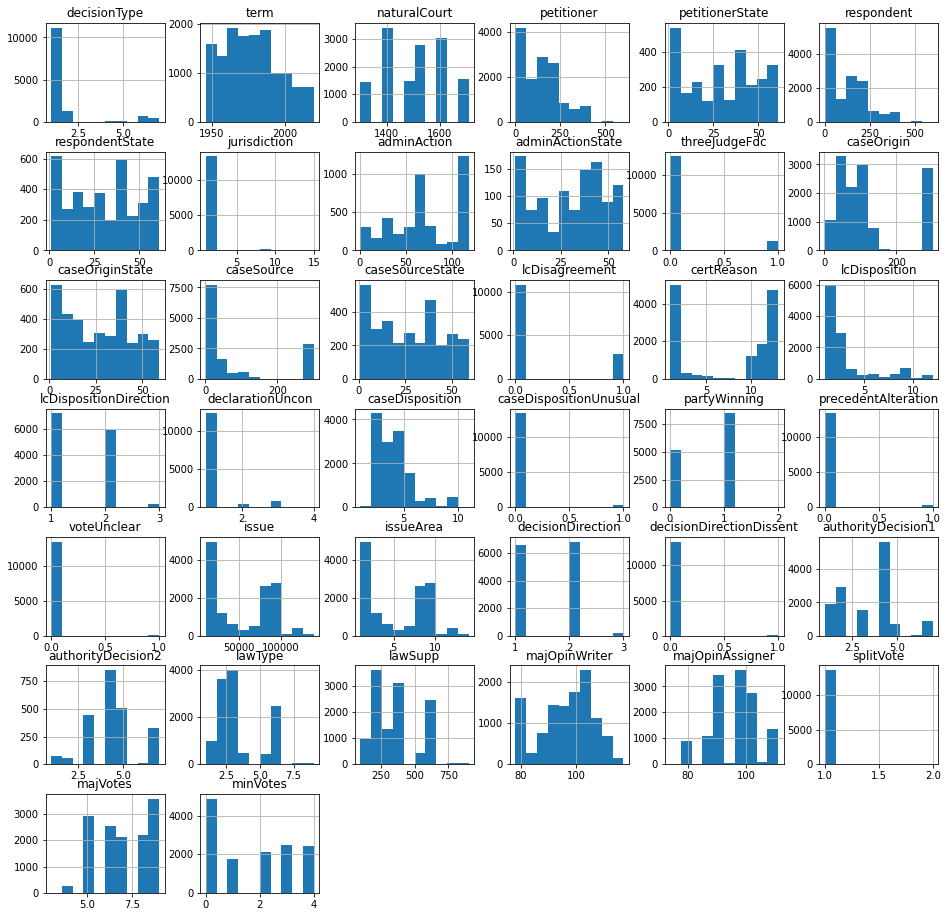

In [11]:
# Data Visualisation 

# Univariate Histograms
from matplotlib import pyplot
df.hist(figsize=(16, 16))
pyplot.show()

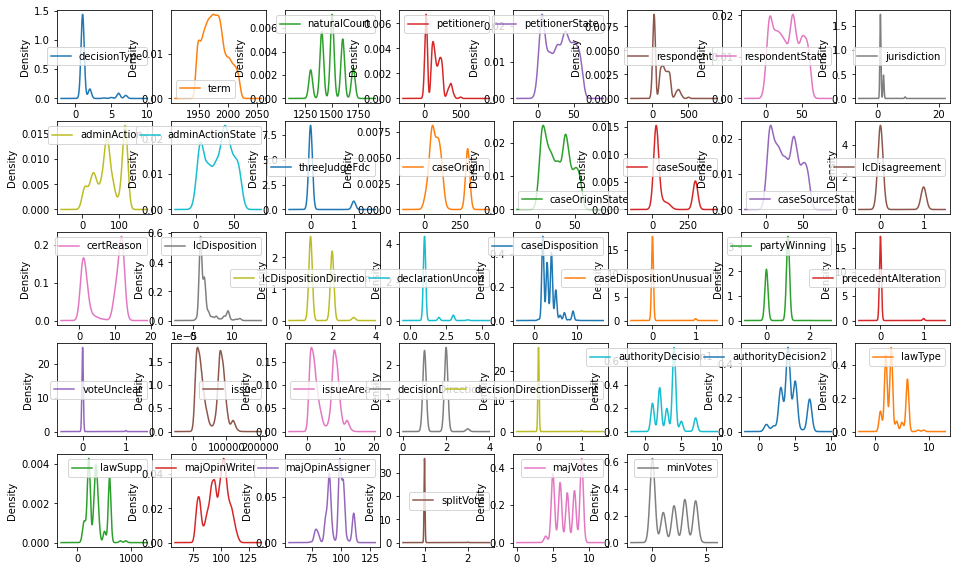

In [12]:
# Univariate Density Plot

df.plot(kind='density', subplots=True, layout=(8, 8), sharex=False, figsize=(16, 16))
pyplot.show()

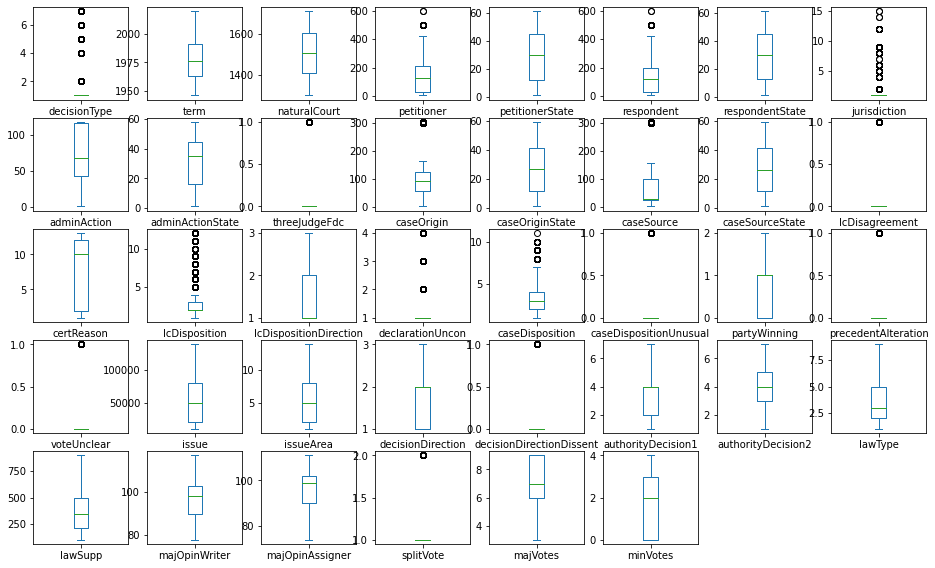

In [13]:
# Box and Whisker Plots

df.plot(kind='box', subplots=True, layout=(8, 8), sharex=False, figsize=(16, 16), sharey=False)
pyplot.show()

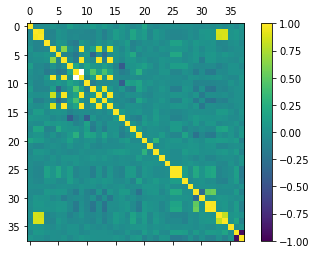

In [14]:
# Correlation Matrix Plot
import numpy

correlations = df.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

pyplot.show()

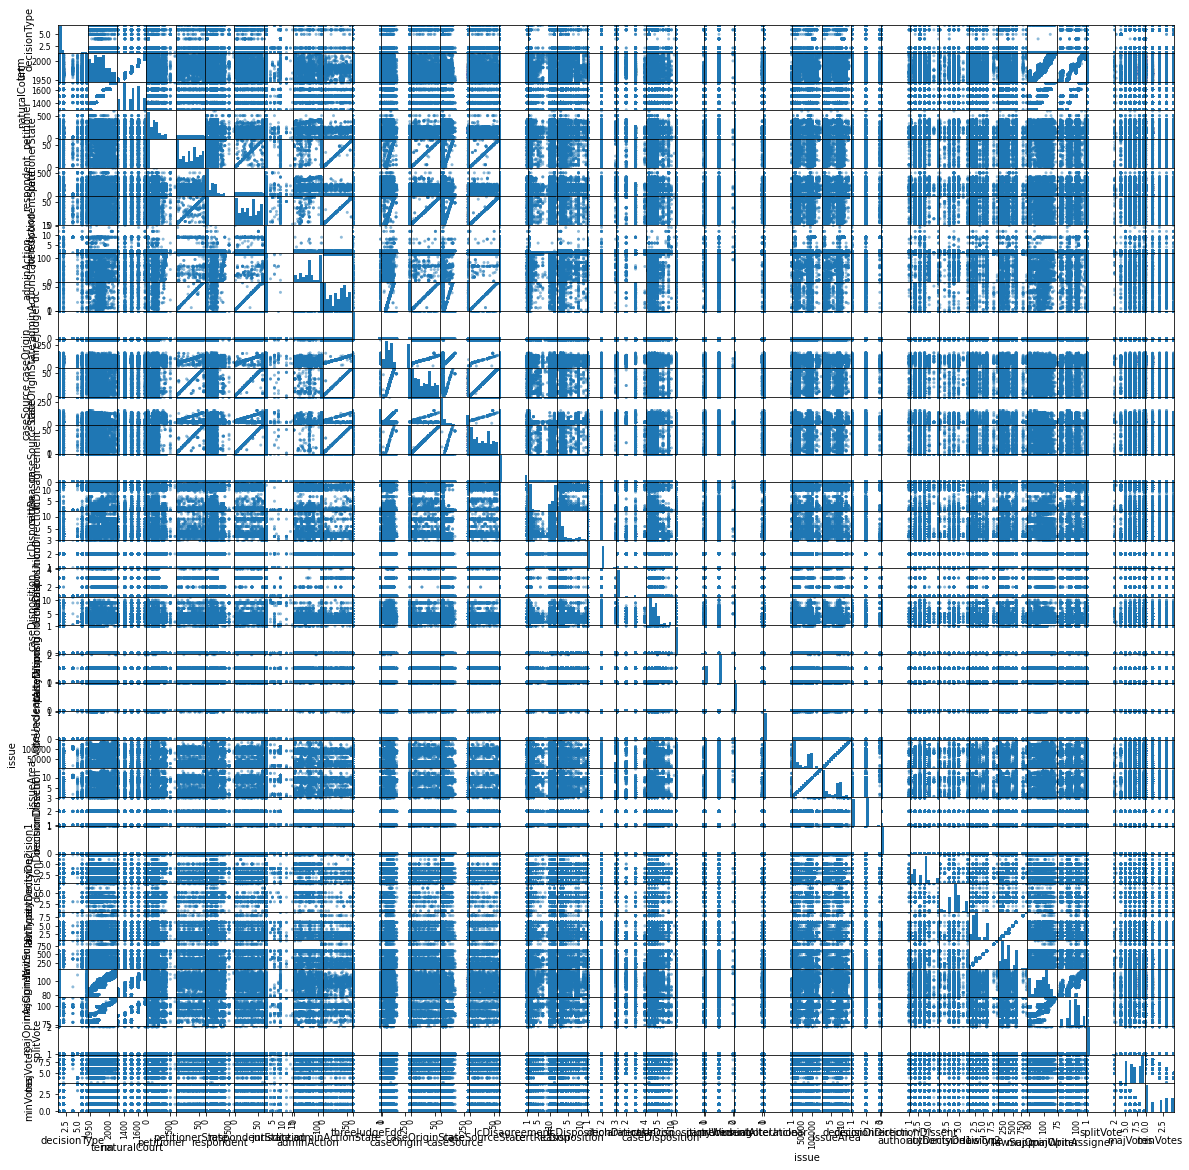

In [15]:
# Scatter plot
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=[20, 20])
pyplot.show()

In [16]:
# Data Pre-processing 

In [17]:
# filtering possible categorical values

cat_df = df.select_dtypes(include=['object']).copy()

cat_df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,usCite,sctCite,ledCite,lexisCite,chief,docket,caseName,dateArgument,dateRearg,lawMinor
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,11/18/1946,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,10/23/1946,35 U.S.C. § 33
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,11/18/1946,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,Vinson,12,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,18 U.S.C. § 398
2,1946-002,1946-002-02,1946-002-02-01,1946-002-02-01-01,11/18/1946,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,Vinson,17,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,18 U.S.C. § 398
3,1946-002,1946-002-03,1946-002-03-01,1946-002-03-01-01,11/18/1946,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,Vinson,14,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,18 U.S.C. § 398
4,1946-002,1946-002-04,1946-002-04-01,1946-002-04-01-01,11/18/1946,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,Vinson,19,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,18 U.S.C. § 398


In [18]:
print(cat_df.shape)

(13703, 15)


In [19]:
# count total number of missing values

print(cat_df.isnull().sum())

caseId              0
docketId            0
caseIssuesId        0
voteId              0
dateDecision        0
usCite            515
sctCite             0
ledCite             2
lexisCite           0
chief               0
docket             31
caseName            0
dateArgument     1320
dateRearg       13328
lawMinor        11234
dtype: int64


In [20]:
# mode imputation for null values

for col in cat_df.columns:
  cat_df = cat_df.fillna(cat_df[col].value_counts().index[0])

In [21]:
print(cat_df.isnull().sum())

caseId          0
docketId        0
caseIssuesId    0
voteId          0
dateDecision    0
usCite          0
sctCite         0
ledCite         0
lexisCite       0
chief           0
docket          0
caseName        0
dateArgument    0
dateRearg       0
lawMinor        0
dtype: int64


In [22]:
# casting categorical variables to category dtype

cat_df_lc = cat_df.copy()

for col in cat_df.columns:
  cat_df_lc[col] = cat_df_lc[col].astype('category')

cat_df_lc.dtypes

caseId          category
docketId        category
caseIssuesId    category
voteId          category
dateDecision    category
usCite          category
sctCite         category
ledCite         category
lexisCite       category
chief           category
docket          category
caseName        category
dateArgument    category
dateRearg       category
lawMinor        category
dtype: object

In [23]:
# label encoding to convert categorical variables

for name in cat_df_lc.columns:
  cat_df_lc[name] = cat_df_lc[name].cat.codes

cat_df_lc.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,usCite,sctCite,ledCite,lexisCite,chief,docket,caseName,dateArgument,dateRearg,lawMinor
0,0,0,0,0,495,1,4497,7882,11,3,2051,3626,424,52,698
1,1,1,1,1,495,3,4415,7779,12,3,1162,1757,464,35,261
2,1,2,2,2,495,3,4415,7779,12,3,1692,1757,464,35,261
3,1,3,3,3,495,3,4415,7779,12,3,1396,1757,464,35,261
4,1,4,4,4,495,3,4415,7779,12,3,1888,1757,464,35,261


In [24]:
# dropping previous categorical variables from original df

old_df = df.copy()

for col in cat_df.columns:
  del old_df[col]

print (old_df)

       decisionType  term  naturalCourt  ...  splitVote  majVotes  minVotes
0                 1  1946          1301  ...          1         8         1
1                 1  1946          1301  ...          1         6         3
2                 1  1946          1301  ...          1         6         3
3                 1  1946          1301  ...          1         6         3
4                 1  1946          1301  ...          1         6         3
...             ...   ...           ...  ...        ...       ...       ...
13698             2  2020          1709  ...          1         8         1
13699             2  2020          1709  ...          1         9         0
13700             2  2020          1709  ...          1         6         3
13701             2  2020          1709  ...          1         9         0
13702             2  2020          1709  ...          1         6         3

[13703 rows x 38 columns]


In [25]:
print(old_df.isnull().sum())

decisionType                    0
term                            0
naturalCourt                    0
petitioner                      2
petitionerState             11006
respondent                      8
respondentState              9968
jurisdiction                    2
adminAction                  9523
adminActionState            12621
threeJudgeFdc                  23
caseOrigin                    470
caseOriginState             10020
caseSource                    289
caseSourceState             10624
lcDisagreement                 15
certReason                    126
lcDisposition                2275
lcDispositionDirection        253
declarationUncon                1
caseDisposition               164
caseDispositionUnusual          1
partyWinning                   17
precedentAlteration             1
voteUnclear                     2
issue                          67
issueArea                      67
decisionDirection              41
decisionDirectionDissent      237
authorityDecis

In [26]:
# mode imputation for null values

for col in old_df.columns:
  old_df = old_df.fillna(old_df[col].value_counts().index[0])

print(old_df.isnull().sum())

decisionType                0
term                        0
naturalCourt                0
petitioner                  0
petitionerState             0
respondent                  0
respondentState             0
jurisdiction                0
adminAction                 0
adminActionState            0
threeJudgeFdc               0
caseOrigin                  0
caseOriginState             0
caseSource                  0
caseSourceState             0
lcDisagreement              0
certReason                  0
lcDisposition               0
lcDispositionDirection      0
declarationUncon            0
caseDisposition             0
caseDispositionUnusual      0
partyWinning                0
precedentAlteration         0
voteUnclear                 0
issue                       0
issueArea                   0
decisionDirection           0
decisionDirectionDissent    0
authorityDecision1          0
authorityDecision2          0
lawType                     0
lawSupp                     0
majOpinWri

In [27]:
# combining with new label encoded variables

numeric_df = old_df.join(cat_df_lc)

print(numeric_df)
print(numeric_df.shape)
print(numeric_df.dtypes)

       decisionType  term  naturalCourt  ...  dateArgument  dateRearg  lawMinor
0                 1  1946          1301  ...           424         52       698
1                 1  1946          1301  ...           464         35       261
2                 1  1946          1301  ...           464         35       261
3                 1  1946          1301  ...           464         35       261
4                 1  1946          1301  ...           464         35       261
...             ...   ...           ...  ...           ...        ...       ...
13698             2  2020          1709  ...          2134        104       373
13699             2  2020          1709  ...          2134        104       373
13700             2  2020          1709  ...          2134        104       373
13701             2  2020          1709  ...          2134        104       373
13702             2  2020          1709  ...          2134        104       373

[13703 rows x 53 columns]
(13703, 53)
d

In [28]:
# Further pre processing - rescale
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = numeric_df.values
X = array[:,0:52]
Y = array[:, 52]
mmscaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = mmscaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.000e+00 0.000e+00 0.000e+00 3.289e-01 0.000e+00 2.855e-01 0.000e+00
  3.571e-01 0.000e+00 0.000e+00 0.000e+00 1.661e-01 8.621e-02 9.302e-02
  0.000e+00 0.000e+00 8.333e-01 9.091e-02 0.000e+00 0.000e+00 2.000e-01
  0.000e+00 5.000e-01 1.000e+00 0.000e+00 5.724e-01 5.385e-01 5.000e-01
  0.000e+00 5.000e-01 0.000e+00 6.250e-01 6.663e-01 6.638e-01 7.000e-01
  0.000e+00 8.333e-01 2.500e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.918e-01 1.155e-04 5.005e-01 8.744e-01 1.210e-03 7.500e-01 2.735e-01
  3.614e-01 1.310e-01 3.741e-01]
 [0.000e+00 0.000e+00 0.000e+00 1.653e-01 0.000e+00 4.341e-02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 4.053e-01 8.793e-01 9.635e-02
  0.000e+00 0.000e+00 2.500e-01 9.091e-02 0.000e+00 0.000e+00 1.000e-01
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 7.496e-02 0.000e+00 0.000e+00
  0.000e+00 5.000e-01 0.000e+00 6.250e-01 6.663e-01 6.897e-01 7.818e-01
  0.000e+00 5.000e-01 7.500e-01 1.100e-04 9.459e-05 7.338e-05 7.298e-05
  1.918e-01 3.464e-04 4.914e-01

In [29]:
# Standardise data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler().fit(X)
standardX = sscaler.transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(standardX[0:5,:])

[[-3.799e-01 -1.655e+00 -1.750e+00  5.168e-01 -4.031e-01  4.076e-01
  -4.933e-01  3.938e+00 -5.646e-01 -2.502e-01 -3.185e-01 -6.898e-01
  -1.366e-01 -5.598e-01 -4.331e-01 -5.188e-01  7.551e-01 -4.226e-01
  -8.824e-01 -3.124e-01 -3.240e-01 -1.496e-01  7.756e-01  6.467e+00
  -1.083e-01  7.556e-01  7.540e-01  8.832e-01 -1.645e-01  4.630e-01
  -4.038e-01  1.670e+00  1.510e+00 -7.872e-02 -9.397e-01 -7.369e-02
   6.355e-01 -4.536e-01 -1.675e+00 -1.713e+00 -1.734e+00 -1.732e+00
  -1.327e+00 -1.563e+00 -1.520e-02  1.228e+00 -1.672e+00  7.830e-01
  -6.776e-01 -4.933e-01 -1.346e+00 -5.659e+00]
 [-3.799e-01 -1.655e+00 -1.750e+00 -4.001e-01 -4.031e-01 -9.315e-01
  -4.933e-01 -3.243e-01 -5.646e-01 -2.502e-01 -3.185e-01  3.773e-02
   3.059e+00 -5.508e-01 -4.331e-01 -5.188e-01 -6.657e-01 -4.226e-01
  -8.824e-01 -3.124e-01 -9.163e-01 -1.496e-01 -1.282e+00 -1.546e-01
  -1.083e-01 -1.192e+00 -1.205e+00 -1.002e+00 -1.645e-01  4.630e-01
  -4.038e-01  1.670e+00  1.510e+00  4.036e-03 -4.080e-01 -7.369e-02
 

In [30]:
# Normalise data (length of 1)
from sklearn.preprocessing import Normalizer

nscaler = Normalizer().fit(X)
normalizedX = nscaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[1.237e-05 2.407e-02 1.609e-02 2.449e-03 1.237e-05 2.128e-03 1.237e-05
  7.422e-05 1.237e-05 1.237e-05 0.000e+00 6.309e-04 7.422e-05 3.587e-04
  1.237e-05 0.000e+00 1.361e-04 2.474e-05 1.237e-05 1.237e-05 3.711e-05
  0.000e+00 1.237e-05 1.237e-05 0.000e+00 9.919e-01 9.896e-05 2.474e-05
  0.000e+00 4.948e-05 1.237e-05 7.422e-05 7.422e-03 9.649e-04 9.649e-04
  1.237e-05 9.896e-05 1.237e-05 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.123e-03 1.237e-05 5.563e-02 9.750e-02 1.361e-04 3.711e-05 2.537e-02
  4.485e-02 5.245e-03 6.433e-04]
 [7.053e-05 1.372e-01 9.176e-02 7.053e-03 7.053e-05 1.904e-03 7.053e-05
  7.053e-05 7.053e-05 7.053e-05 0.000e+00 8.675e-03 3.667e-03 2.116e-03
  7.053e-05 0.000e+00 2.821e-04 1.411e-04 7.053e-05 7.053e-05 1.411e-04
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 7.405e-01 7.053e-05 7.053e-05
  0.000e+00 2.821e-04 7.053e-05 4.232e-04 4.232e-02 5.713e-03 6.136e-03
  7.053e-05 4.232e-04 2.116e-04 7.053e-05 7.053e-05 7.053e-05 7.053e-05
  3.491e-02 2.116e-04 3.114e-01

In [31]:
# binarisation
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
  0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
  0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
  0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
  0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
  0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]]


In [32]:
# Running decision tree algorithm on raw and processed data to compare accuracy

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print("Mean estimated accuracy \n",results.mean())

# Decision tree classification on normalised data
results2 = cross_val_score(model, normalizedX, Y, cv=kfold)
print("Mean estimated accuracy on normalised data \n",results2.mean())

# Decision tree classification on rescaled data
results3 = cross_val_score(model, rescaledX, Y, cv=kfold)
print("Mean estimated accuracy on rescaled data \n",results3.mean())

# Decision tree classification on standardised data
results4 = cross_val_score(model, standardX, Y, cv=kfold)
print("Mean estimated accuracy on standardised data \n",results4.mean())

# Decision tree classification on binarised data
results5 = cross_val_score(model, binaryX, Y, cv=kfold)
print("Mean estimated accuracy on binarised data \n",results5.mean())

Mean estimated accuracy 
 0.8264604662801409
Mean estimated accuracy on normalised data 
 0.8163890707938688
Mean estimated accuracy on rescaled data 
 0.8264607324825504
Mean estimated accuracy on standardised data 
 0.825949836817923
Mean estimated accuracy on binarised data 
 0.8187979363989204
